In [35]:

from pathlib import Path
import hvplot.pandas
import matplotlib
import pandas as pd
import numpy as np


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA

In [36]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [5]:
dataframe = pd.read_csv(Path("./combined_data.csv"), index_col= "Date", parse_dates= True)
dataframe.head()

,Jets,Oil,USD,Cheap,Flights,Best airlines,Travel,luggage,luggage weight,suitcase,carry on,precheck,RV,train,bus,car,road
Date,,,,,,,,,,,,,,,,,
2018-01-19,1.598610,-0.071557,-1.206932,1.254672,0.403785,0.0,-0.832702,0.767616,0.507135,-0.356336,0.082073,-0.048722,0.390248,0.940826,0.619174,0.309830,0.453984
2018-01-22,1.608980,-0.065567,-1.240061,1.254672,0.117702,0.0,-0.832702,0.686970,0.507135,-0.356336,-0.027707,-0.048722,0.390248,1.023929,0.736924,-0.395912,0.453984
2018-01-23,1.643540,-0.016654,-1.294625,1.254672,0.117702,0.0,-0.832702,0.686970,0.507135,-0.356336,-0.027707,-0.048722,0.390248,1.023929,0.736924,-0.395912,0.453984
2018-01-24,1.394699,0.040246,-1.471961,1.254672,0.117702,0.0,-0.832702,0.686970,0.507135,-0.356336,-0.027707,-0.048722,0.390248,1.023929,0.736924,-0.395912,0.453984
2018-01-25,1.263365,0.035255,-1.436884,1.254672,0.117702,0.0,-0.832702,0.686970,0.507135,-0.356336,-0.027707,-0.048722,0.390248,1.023929,0.736924,-0.395912,0.453984


In [6]:
X = dataframe.copy()
X.drop("Jets", axis=1, inplace=True)
X.head()


,Oil,USD,Cheap,Flights,Best airlines,Travel,luggage,luggage weight,suitcase,carry on,precheck,RV,train,bus,car,road
Date,,,,,,,,,,,,,,,,
2018-01-19,-0.071557,-1.206932,1.254672,0.403785,0.0,-0.832702,0.767616,0.507135,-0.356336,0.082073,-0.048722,0.390248,0.940826,0.619174,0.309830,0.453984
2018-01-22,-0.065567,-1.240061,1.254672,0.117702,0.0,-0.832702,0.686970,0.507135,-0.356336,-0.027707,-0.048722,0.390248,1.023929,0.736924,-0.395912,0.453984
2018-01-23,-0.016654,-1.294625,1.254672,0.117702,0.0,-0.832702,0.686970,0.507135,-0.356336,-0.027707,-0.048722,0.390248,1.023929,0.736924,-0.395912,0.453984
2018-01-24,0.040246,-1.471961,1.254672,0.117702,0.0,-0.832702,0.686970,0.507135,-0.356336,-0.027707,-0.048722,0.390248,1.023929,0.736924,-0.395912,0.453984
2018-01-25,0.035255,-1.436884,1.254672,0.117702,0.0,-0.832702,0.686970,0.507135,-0.356336,-0.027707,-0.048722,0.390248,1.023929,0.736924,-0.395912,0.453984


In [10]:
y = dataframe.loc[:,['Jets']]
y.head()

,Jets
Date,
2018-01-19,1.598610
2018-01-22,1.608980
2018-01-23,1.643540
2018-01-24,1.394699
2018-01-25,1.263365


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [20]:
pca=PCA(n_components=4)

In [21]:
# Fit the PCA model on the transformed credit card DataFrame
X_train_data_pca = pca.fit_transform(X_train)

# Review the first 5 rows of the array of list data
X_train_data_pca[:5]

array([[ 1.48452428, -0.04079163, -1.79798581,  0.68907888],
       [ 1.73357002,  0.12928186, -2.16823065,  1.01739443],
       [-1.41471803,  2.5525187 , -1.09167959, -0.16452368],
       [ 1.62242244, -0.02565089, -1.29025354,  0.37726963],
       [-1.9926822 , -1.08920671,  0.4072132 , -0.75803526]])

In [22]:
pca.explained_variance_ratio_
sum(pca.explained_variance_ratio_)

0.9004807737086

In [23]:
# Create the PCA DataFrame
X_train_data_pca_df = pd.DataFrame(
    X_train_data_pca,
    columns=["PCA1", "PCA2", "PCA3", "PCA4"]
)

# Review the PCA DataFrame
X_train_data_pca_df.head()

,PCA1,PCA2,PCA3,PCA4
0,1.484524,-0.040792,-1.797986,0.689079
1,1.733570,0.129282,-2.168231,1.017394
2,-1.414718,2.552519,-1.091680,-0.164524
3,1.622422,-0.025651,-1.290254,0.377270
4,-1.992682,-1.089207,0.407213,-0.758035


In [29]:
X_test_data_df = pca.transform(X_test)

In [30]:
# Create the PCA DataFrame
X_test_data_pca_df = pd.DataFrame(
    X_test_data_df,
    columns=["PCA1", "PCA2", "PCA3", "PCA4"]
)

# Review the PCA DataFrame
X_test_data_pca_df.head()

,PCA1,PCA2,PCA3,PCA4
0,-2.458256,-0.994968,0.436929,-0.502674
1,4.818935,-0.302426,1.558411,1.932650
2,-4.602104,-1.000385,-0.104457,0.029304
3,5.314198,-0.761926,0.816002,-1.735589
4,-2.668409,-1.113699,0.760994,-0.280562


In [39]:
X_total_data_df= pca.transform(X)

In [40]:
X_test_total_pca_df = pd.DataFrame(
    X_total_data_df,
    columns=["PCA1", "PCA2", "PCA3", "PCA4"]
)

# Review the PCA DataFrame
X_test_total_pca_df.head()

,PCA1,PCA2,PCA3,PCA4
0,-1.469718,-1.719682,0.058768,0.321032
1,-1.217904,-1.530652,0.251743,0.320117
2,-1.218587,-1.534422,0.217415,0.356950
3,-1.206909,-1.598214,0.142944,0.458333
4,-1.210071,-1.582433,0.155398,0.439404


In [31]:
ridge_model = Ridge(alpha= 0.3)

In [32]:
ridge_model.fit(X_train_data_pca_df,y_train)

Ridge(alpha=0.3)

In [33]:
pred_train_ridge = ridge_model.predict(X_train_data_pca_df)


In [34]:

print(r2_score(y_train, pred_train_ridge))

0.8048994229949151


In [37]:
pred_test_ridge = ridge_model.predict(X_test_data_pca_df)

In [38]:
print(r2_score(y_test, pred_test_ridge))

0.8165901869224804


In [41]:
Pred_total_data = ridge_model.predict(X_test_total_pca_df)

<AxesSubplot:>

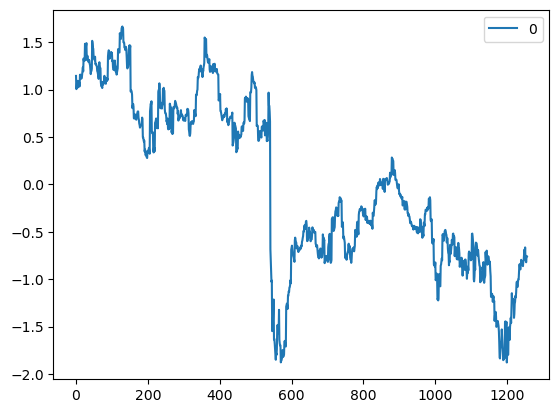

In [45]:
Pred_total_data_df = pd.DataFrame(Pred_total_data)
Pred_total_data_df.plot()

In [46]:
df_plot_data =y.copy() 

In [48]:
df_plot_data["pred"] = Pred_total_data
df_plot_data.head()

,Jets,pred
Date,,
2018-01-19,1.598610,1.144038
2018-01-22,1.608980,1.004881
2018-01-23,1.643540,1.020653
2018-01-24,1.394699,1.084706
2018-01-25,1.263365,1.071251


<AxesSubplot:xlabel='Date'>

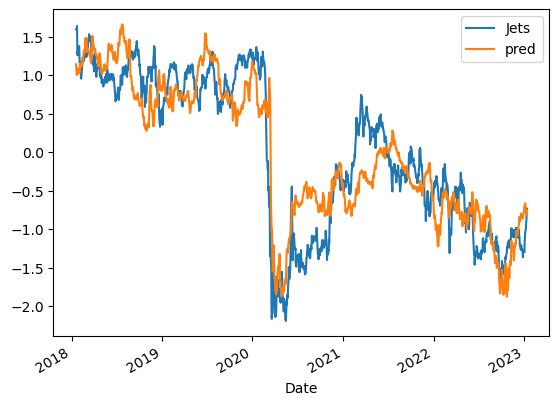

In [49]:
df_plot_data.plot()